#Importing Libraries

In [177]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [178]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

#Uploading Datasets

In [179]:
data=pd.read_csv("/content/drive/MyDrive/ColabNotebooks/AI_Assignments/compresive_strength_concrete.csv")

In [180]:
data.shape

(1030, 9)

In [181]:
data.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [182]:
data.isnull().sum()

Cement (component 1)(kg in a m^3 mixture)                0
Blast Furnace Slag (component 2)(kg in a m^3 mixture)    0
Fly Ash (component 3)(kg in a m^3 mixture)               0
Water  (component 4)(kg in a m^3 mixture)                0
Superplasticizer (component 5)(kg in a m^3 mixture)      0
Coarse Aggregate  (component 6)(kg in a m^3 mixture)     0
Fine Aggregate (component 7)(kg in a m^3 mixture)        0
Age (day)                                                0
Concrete compressive strength(MPa, megapascals)          0
dtype: int64

In [183]:
np.where(data.applymap(lambda x: x == ''))

(array([], dtype=int64), array([], dtype=int64))

In [184]:
data.describe()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [185]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   Cement (component 1)(kg in a m^3 mixture)              1030 non-null   float64
 1   Blast Furnace Slag (component 2)(kg in a m^3 mixture)  1030 non-null   float64
 2   Fly Ash (component 3)(kg in a m^3 mixture)             1030 non-null   float64
 3   Water  (component 4)(kg in a m^3 mixture)              1030 non-null   float64
 4   Superplasticizer (component 5)(kg in a m^3 mixture)    1030 non-null   float64
 5   Coarse Aggregate  (component 6)(kg in a m^3 mixture)   1030 non-null   float64
 6   Fine Aggregate (component 7)(kg in a m^3 mixture)      1030 non-null   float64
 7   Age (day)                                              1030 non-null   int64  
 8   Concrete compressive strength(MPa, megapascals)  

In [186]:
data.empty

False

In [187]:
X_train = data.sample(frac = 0.7, random_state = 123)
X_test = data.drop(X_train.index)

In [188]:
X_train.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
134,362.6,189.0,0.0,164.9,11.6,944.7,755.8,28,71.30
13,190.0,190.0,0.0,228.0,0.0,932.0,670.0,90,42.33
996,152.6,238.7,0.0,200.0,6.3,1001.8,683.9,28,26.86
770,349.0,0.0,0.0,192.0,0.0,1047.0,806.0,3,14.99
937,313.3,0.0,113.0,178.5,8.0,1001.9,688.7,28,36.80


#Assigning features and target variable

In [189]:
Y_train = X_train.iloc[:,-1]
X_train = X_train.iloc[:,0:-1]
Y_test = X_test.iloc[:,-1]
X_test = X_test.iloc[:,0:-1]

In [190]:
X_mean = X_train.mean()
X_train -= X_mean
X_std = X_train.std()
X_train /= X_std
X_test -= X_mean
X_test /= X_std

In [191]:
# Y_mean = Y_train.mean()
# Y_train -= Y_mean
# Y_std = Y_train.std()
# Y_train /= Y_std
# Y_test -= Y_mean
# Y_test /= Y_std

In [192]:
Y_train

134    71.30
13     42.33
996    26.86
770    14.99
937    36.80
       ...  
931    15.34
466    33.56
983    29.07
918    10.54
423    29.75
Name: Concrete compressive strength(MPa, megapascals) , Length: 721, dtype: float64

In [193]:
X_train.dtypes

Cement (component 1)(kg in a m^3 mixture)                float64
Blast Furnace Slag (component 2)(kg in a m^3 mixture)    float64
Fly Ash (component 3)(kg in a m^3 mixture)               float64
Water  (component 4)(kg in a m^3 mixture)                float64
Superplasticizer (component 5)(kg in a m^3 mixture)      float64
Coarse Aggregate  (component 6)(kg in a m^3 mixture)     float64
Fine Aggregate (component 7)(kg in a m^3 mixture)        float64
Age (day)                                                float64
dtype: object

In [194]:
X_train = X_train.to_numpy()
Y_train = Y_train.to_numpy()
X_test = X_test.to_numpy()
Y_test = Y_test.to_numpy()


#Training and testing data splittion

#Model selection

In [195]:
from tensorflow.keras import layers as L
from tensorflow.keras import models as M

In [196]:
network = M.Sequential()

In [197]:
network.add(L.Dense(128,activation="relu",input_shape=(X_train.shape[1],)))

In [198]:
network.add(L.Dense(64,activation="relu"))

In [199]:
network.add(L.Dense(32,activation="relu"))

In [200]:
network.add(L.Dense(1))

In [201]:
network.compile(optimizer="rmsprop",loss=["mse"],metrics=["mae"])

In [202]:
history = network.fit(X_train,Y_train,epochs=100,validation_split=0.3, batch_size = 16)

Epoch 1/100
32/32 [==============================] - 1s 6ms/step - loss: 1496.1944 - mae: 35.2121 - val_loss: 1051.0293 - val_mae: 27.6157
Epoch 2/100
32/32 [==============================] - 0s 3ms/step - loss: 932.8411 - mae: 26.1340 - val_loss: 334.6891 - val_mae: 14.2716
Epoch 3/100
32/32 [==============================] - 0s 3ms/step - loss: 240.9372 - mae: 12.2475 - val_loss: 212.7736 - val_mae: 11.8476
Epoch 4/100
32/32 [==============================] - 0s 3ms/step - loss: 224.6584 - mae: 12.2290 - val_loss: 183.8402 - val_mae: 11.1679
Epoch 5/100
32/32 [==============================] - 0s 3ms/step - loss: 195.4503 - mae: 11.6146 - val_loss: 175.4267 - val_mae: 10.9326
Epoch 6/100
32/32 [==============================] - 0s 3ms/step - loss: 172.5532 - mae: 10.9043 - val_loss: 164.6297 - val_mae: 10.6208
Epoch 7/100
32/32 [==============================] - 0s 3ms/step - loss: 160.2604 - mae: 10.4081 - val_loss: 157.5712 - val_mae: 10.3996
Epoch 8/100
32/32 [====================

In [203]:
history.history.keys()

dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])

In [204]:
loss,mae=network.evaluate(X_test,Y_test)

10/10 [==============================] - 0s 1ms/step - loss: 38.5778 - mae: 4.4400


In [205]:
val_mae = history.history['val_mae']
val_loss = history.history['val_loss']

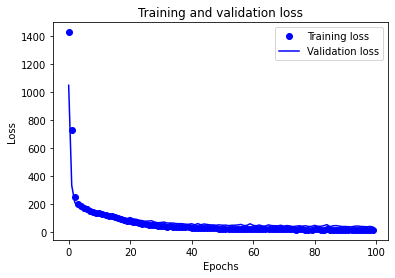

In [206]:
import matplotlib.pyplot as plt 
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(100)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

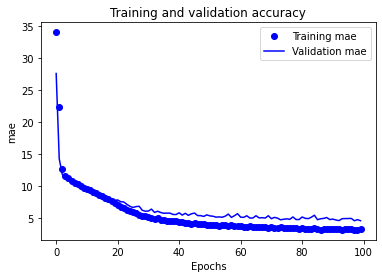

In [207]:
import matplotlib.pyplot as plt 
acc_values = history_dict['mae']
val_acc_values = history_dict['val_mae']
plt.plot(epochs, acc_values, 'bo', label='Training mae')
plt.plot(epochs, val_acc_values, 'b', label='Validation mae')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('mae')
plt.legend()
plt.show()

In [208]:
y_pred = network.predict(X_test)

In [209]:
# def denorm(x):
#    return (x * Y_std) + Y_mean
    

In [210]:
# y_pred = denorm(y_pred)

In [211]:
# y_true = denorm(Y_test)

In [212]:
y_pred = y_pred.reshape(y_pred.shape[0])

In [213]:
y_pred

array([49.575348 , 54.827415 , 31.19637  , 35.70423  , 33.465225 ,
       43.16816  , 46.436794 , 48.845448 , 46.552315 , 14.362256 ,
       49.454052 , 44.848278 , 54.192764 , 43.935463 , 43.62623  ,
       42.724632 , 27.397205 , 26.352457 , 73.8074   , 43.407806 ,
       53.295025 , 43.471603 , 34.419357 , 31.400654 , 34.419357 ,
       30.798103 , 47.569702 , 56.44142  , 39.258434 , 38.25976  ,
       39.258434 , 39.258434 , 50.483025 , 44.73637  , 61.079624 ,
       65.45967  , 60.726517 , 66.726906 , 68.05343  , 65.45967  ,
       74.98684  , 68.610664 , 64.73585  , 62.861973 , 64.73585  ,
       64.73585  , 76.4959   , 78.08281  , 75.1029   , 78.64785  ,
       85.892876 , 77.64693  , 27.360153 , 33.969757 , 39.092205 ,
       13.167842 , 40.45514  , 43.00006  , 27.958275 , 35.42473  ,
       40.833786 , 40.119373 , 21.017868 , 45.417805 , 16.92437  ,
       30.705544 ,  9.197749 , 16.008148 , 47.55816  ,  9.854012 ,
       37.67994  , 33.291126 , 42.44648  , 28.554703 , 45.8622

In [214]:
Y_test

array([40.27, 41.05, 45.85, 38.07, 47.81, 39.36, 56.14, 36.25, 41.54,
       15.05, 40.76, 46.93, 41.93, 50.95, 54.38, 55.06, 30.28, 40.86,
       71.99, 36.3 , 40.2 , 33.4 , 35.3 , 24.4 , 35.3 , 24.1 , 46.8 ,
       54.9 , 55.9 , 47.1 , 55.9 , 55.9 , 56.1 , 59.09, 60.29, 71.3 ,
       74.7 , 66.  , 74.5 , 71.3 , 63.4 , 64.9 , 64.3 , 60.2 , 64.3 ,
       64.3 , 77.3 , 54.9 , 71.7 , 70.7 , 56.5 , 73.3 , 24.89, 29.45,
       34.56, 12.45, 33.96, 37.34, 24.9 , 34.2 , 39.61, 35.34, 22.72,
       40.39, 25.48, 28.63,  7.75, 17.82, 49.97, 19.93, 39.59, 29.22,
       42.35, 26.31, 42.55, 13.33, 44.4 , 31.35, 33.73, 32.66, 21.5 ,
       48.67, 31.12, 34.74, 23.14, 41.89, 48.72, 33.36, 15.36, 30.85,
       42.03, 51.06, 21.78, 42.29, 56.85, 21.91, 36.99, 47.4 , 51.96,
       30.45, 47.71, 66.82, 66.95, 27.42, 35.96, 18.02, 38.6 , 30.22,
       36.3 , 57.23, 78.8 , 60.28, 39.38, 44.33, 52.3 , 58.52, 69.84,
       19.42, 14.94, 21.29, 23.08, 15.52, 11.98, 16.88, 33.09, 31.81,
       33.01, 24.66,

In [215]:
y_pred.shape

(309,)

In [216]:
# y_true.shape

(0.0, 100.0)

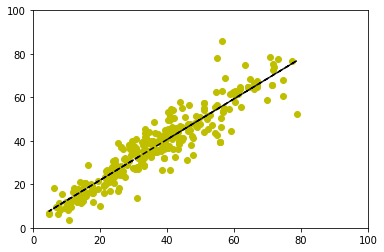

In [217]:
import numpy as np
import matplotlib.pyplot as plt
coef = np.polyfit(Y_test,y_pred,1)
poly1d_fn = np.poly1d(coef) 
# poly1d_fn is now a function which takes in x and returns an estimate for y
plt.plot(Y_test,y_pred, 'yo', Y_test, poly1d_fn(Y_test), '--k')
plt.xlim(0, 100)
plt.ylim(0, 100)